In [19]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
matplotlib.pyplot import figure f


SyntaxError: invalid syntax (<ipython-input-19-1c7eef5cf172>, line 6)

In [12]:

df = pd.read_csv('seeds.csv')
df.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


#### - let's check how many unique type we have 

In [13]:
df['Type'].unique()

array([1, 2, 3], dtype=int64)

- we have 3 unique types of seed in our dataset 

In [15]:
df.isnull().sum()

Area               0
Perimeter          0
Compactness        0
Kernel.Length      0
Kernel.Width       0
Asymmetry.Coeff    0
Kernel.Groove      0
Type               0
dtype: int64

-no null values

In [16]:
df.keys()

Index(['Area', 'Perimeter', 'Compactness', 'Kernel.Length', 'Kernel.Width',
       'Asymmetry.Coeff', 'Kernel.Groove', 'Type'],
      dtype='object')

In [18]:

X = df[['Area', 'Perimeter', 'Compactness', 'Kernel.Length', 'Kernel.Width',
       'Asymmetry.Coeff', 'Kernel.Groove']]
y = df['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


<IPython.core.display.Javascript object>


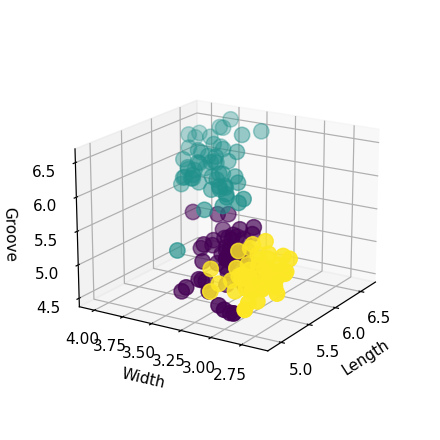

In [22]:
# plotting a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(4,4))

ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['Kernel.Length'], X_train['Kernel.Width'], X_train['Kernel.Groove'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('Length')

ax.set_ylabel('Width')
ax.set_zlabel('Groove')
plt.show()

### Create classifier object

In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

In [24]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

### Estimate the accuracy of the classifier on future data, using the test data

In [26]:
print(knn.score(X_test, y_test)*100,"%")

90.0 %


### quite good accuracy 

In [30]:


# create a mapping from type label value to type of seed to make results easier to interpret
lookup_seed_type= dict(zip(df['Type'].unique(), ['Type_1_seed','Type_2_seed','Type_3_seed']))
lookup_seed_type

{1: 'Type_1_seed', 2: 'Type_2_seed', 3: 'Type_3_seed'}

In [31]:
# first example: a small seeds with area 16.1, Perimeter 15.0,  Compactness0.9,
#Kernel.Length5.5 ,Kernel.Width 3.8,Asymmetry.Coeff 2.5,'Kernel.Groove 5.7
seed_type_prediction = knn.predict([[16.1,15.0,0.9,5.5,3.8,2.5,5.7]])
lookup_seed_type[seed_type_prediction[0]]

'Type_1_seed'

<IPython.core.display.Javascript object>


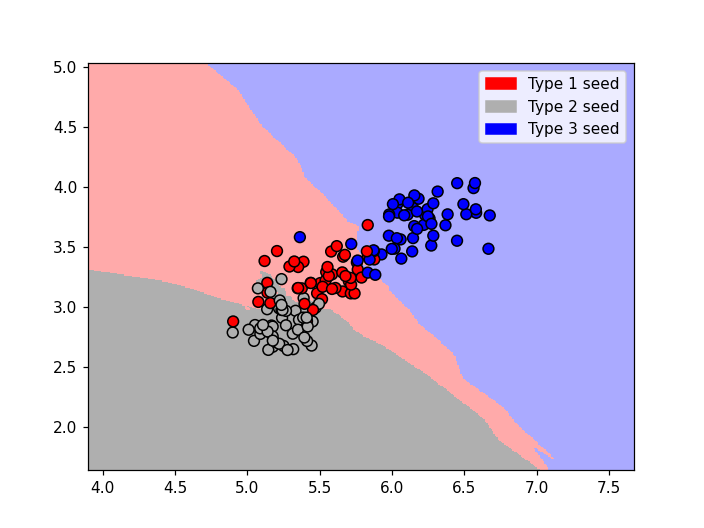

In [40]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import matplotlib.patches as mpatches
from sklearn.neighbors import KNeighborsClassifier
X = df[['Area', 'Perimeter', 'Compactness', 'Kernel.Length', 'Kernel.Width',
       'Asymmetry.Coeff', 'Kernel.Groove']]
y = df['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

def plot_seed_type_knn(X, y, n_neighbors, weights):
    X_mat = X[['Kernel.Length', 'Kernel.Width']].values
    y_mat = y.values
# Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)
# Plot the decision boundary by assigning a color in the color map
    # to each mesh point.

    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50

    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light,shading='auto')
# Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    patch0 = mpatches.Patch(color='#FF0000', label='Type 1 seed')
    patch1 = mpatches.Patch(color='#AFAFAF', label='Type 2 seed')
    patch2 = mpatches.Patch(color='#0000FF', label='Type 3 seed')
   
    plt.legend(handles=[patch0, patch1, patch2])
plt.xlabel('length (cm)')
plt.ylabel('width (cm)')
#plt.title("4-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights))    
plt.show()
plot_seed_type_knn(X_train, y_train, 5, 'uniform')